In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Class names in the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
# Print the shape of the data
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [5]:
# Print the number of classes
print("Number of classes:", len(class_names))

Number of classes: 10


In [6]:
# Scale pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# Reshape the data to add a channel dimension (required for some Keras layers)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [8]:

print("Training data shape after reshaping:", x_train.shape)
print("Testing data shape after reshaping:", x_test.shape)

Training data shape after reshaping: (60000, 28, 28, 1)
Testing data shape after reshaping: (10000, 28, 28, 1)


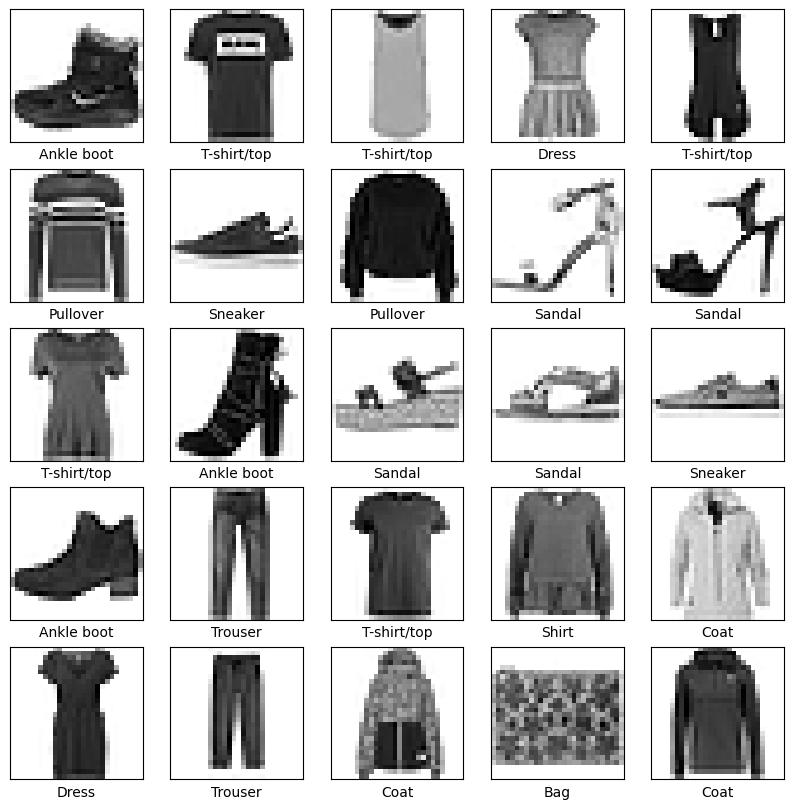

In [9]:
# Display sample images from the dataset
def plot_sample_images(images, labels, class_names, num_rows=5, num_cols=5):
    plt.figure(figsize=(num_cols * 2, num_rows * 2))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

plot_sample_images(x_train, y_train, class_names)

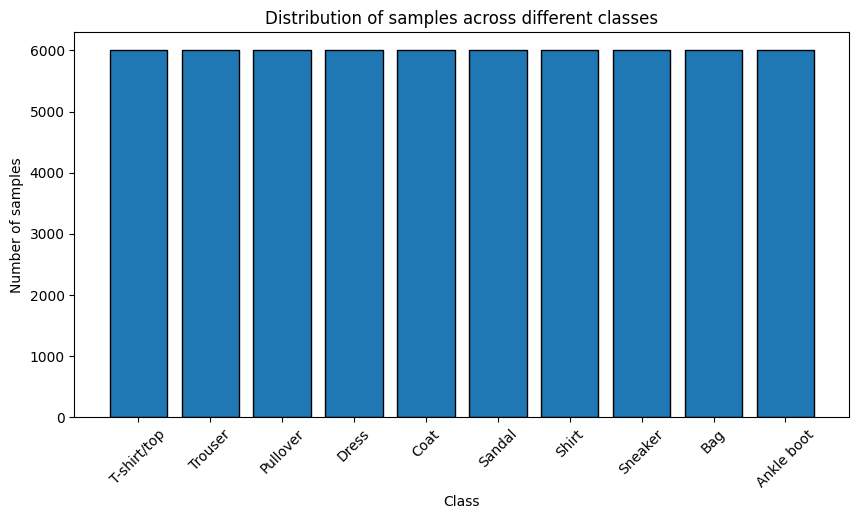

In [10]:
# Bar chart showing the distribution of samples across different classes
def plot_class_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    plt.hist(labels, bins=np.arange(len(class_names) + 1) - 0.5, edgecolor='black', rwidth=0.8)
    plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title('Distribution of samples across different classes')
    plt.show()

plot_class_distribution(y_train, class_names)

Convolutional Neural Network (CNN)

In [24]:
# Define the model
model_cnn= Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Print the first model summary (CNN)
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [25]:
# Compile the first model
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Train the first model
history_cnn = model_cnn.fit(x_train, y_train, epochs=10,
                    validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 51s 68ms/step - loss: 0.4638 - accuracy: 0.8344 - val_loss: 0.3534 - val_accuracy: 0.8723
Epoch 2/10
750/750 [==============================] - 58s 77ms/step - loss: 0.3803 - accuracy: 0.8633 - val_loss: 0.3138 - val_accuracy: 0.8851
Epoch 3/10
750/750 [==============================] - 46s 61ms/step - loss: 0.3371 - accuracy: 0.8800 - val_loss: 0.3018 - val_accuracy: 0.8878
Epoch 4/10
750/750 [==============================] - 54s 72ms/step - loss: 0.3074 - accuracy: 0.8879 - val_loss: 0.2794 - val_accuracy: 0.8966
Epoch 5/10
750/750 [==============================] - 43s 57ms/step - loss: 0.2845 - accuracy: 0.8957 - val_loss: 0.2653 - val_accuracy: 0.9013
Epoch 6/10
750/750 [==============================] - 45s 60ms/step - loss: 0.2687 - accuracy: 0.9021 - val_loss: 0.2604 - val_accuracy: 0.9022
Epoch 7/10
750/750 [==============================] - 43s 57ms/step - loss: 0.2517 - accuracy: 0.9084 - val_loss: 0.2519 - val_accuracy:

313/313 [==============================] - 3s 9ms/step - loss: 0.2595 - accuracy: 0.9040

Test accuracy: 0.9039999842643738


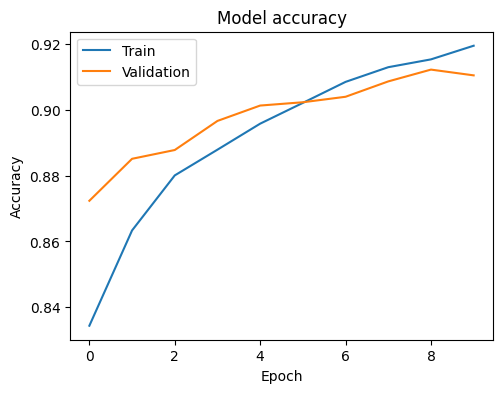

In [28]:
# Evaluate the first model on the test set
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print("\nTest accuracy:", test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

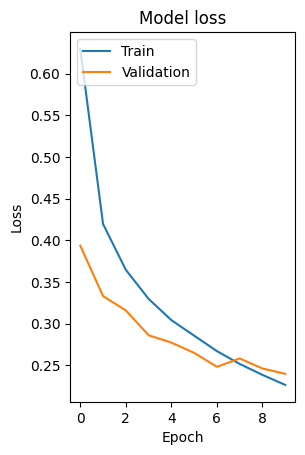

In [15]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 [==============================] - 4s 11ms/step


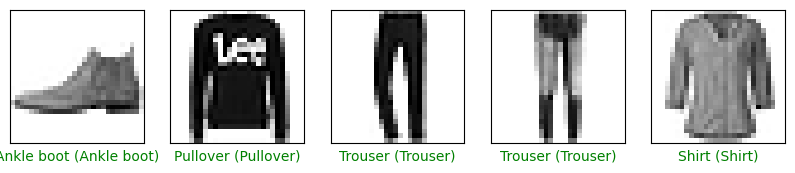

In [29]:
# Predict classes for the test set using the CNN model
predictions = model_cnn.predict(x_test)

# Display sample predictions for the CNN Model
def display_sample_predictions_cnn(images, labels, predictions, class_names, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)
    plt.show()

display_sample_predictions_cnn(x_test, y_test, predictions, class_names)

Multilayer Perceptron (MLP)

In [34]:
# Define the second model (MLP)
model_mlp = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Print the second model summary
model_mlp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 53581

In [35]:
# Compile the second model
model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [36]:
# Train the second model
history_mlp = model_mlp.fit(x_train, y_train, epochs=10,
                            validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 11s 13ms/step - loss: 0.6611 - accuracy: 0.7591 - val_loss: 0.4392 - val_accuracy: 0.8399
Epoch 2/10
750/750 [==============================] - 10s 13ms/step - loss: 0.4839 - accuracy: 0.8251 - val_loss: 0.4333 - val_accuracy: 0.8398
Epoch 3/10
750/750 [==============================] - 11s 14ms/step - loss: 0.4507 - accuracy: 0.8375 - val_loss: 0.3820 - val_accuracy: 0.8579
Epoch 4/10
750/750 [==============================] - 11s 14ms/step - loss: 0.4272 - accuracy: 0.8456 - val_loss: 0.3689 - val_accuracy: 0.8622
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.4108 - accuracy: 0.8500 - val_loss: 0.3566 - val_accuracy: 0.8716
Epoch 6/10
750/750 [==============================] - 10s 14ms/step - loss: 0.3959 - accuracy: 0.8552 - val_loss: 0.3482 - val_accuracy: 0.8732
Epoch 7/10
750/750 [==============================] - 11s 14ms/step - loss: 0.3870 - accuracy: 0.8587 - val_loss: 0.3348 - val_accuracy: 

313/313 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.8731

Test accuracy of the MLP model: 0.8730999827384949


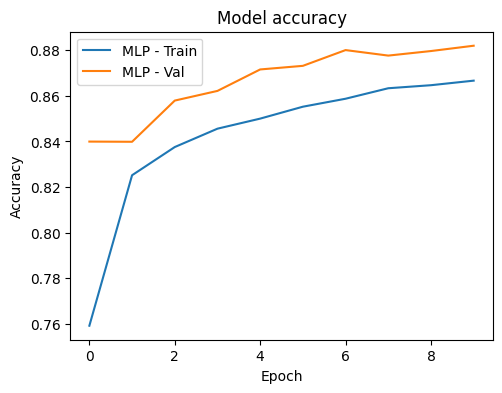

In [37]:
# Evaluate the second model on the test set
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(x_test, y_test)
print("\nTest accuracy of the MLP model:", test_acc_mlp)

# Plot training & validation accuracy values for both models
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(history_mlp.history['accuracy'], label='MLP - Train')
plt.plot(history_mlp.history['val_accuracy'], label='MLP - Val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

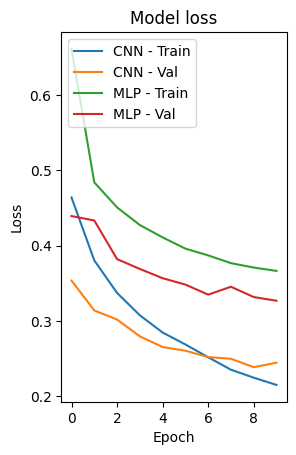

In [38]:
# Plot training & validation loss values for both models
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='CNN - Train')
plt.plot(history_cnn.history['val_loss'], label='CNN - Val')
plt.plot(history_mlp.history['loss'], label='MLP - Train')
plt.plot(history_mlp.history['val_loss'], label='MLP - Val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

313/313 [==============================] - 3s 8ms/step


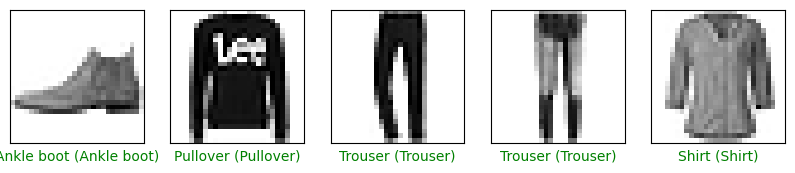

In [39]:
# Predict classes for the test set using the CNN model
predictions_cnn = model_cnn.predict(x_test)

# Display sample predictions for the CNN model
def display_sample_predictions_cnn(images, labels, predictions, class_names, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)
    plt.show()

display_sample_predictions_cnn(x_test, y_test, predictions_cnn, class_names)


313/313 [==============================] - 1s 3ms/step


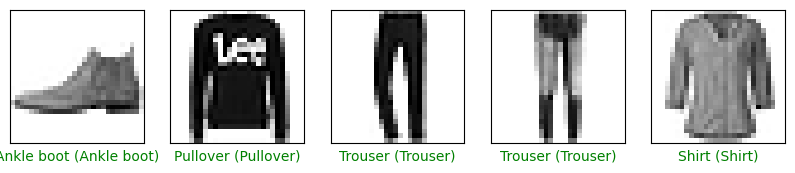

In [40]:
# Predict classes for the test set using the MLP model
predictions_mlp = model_mlp.predict(x_test)

# Display sample predictions for the MLP model
def display_sample_predictions_mlp(images, labels, predictions, class_names, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)
    plt.show()

display_sample_predictions_mlp(x_test, y_test, predictions_mlp, class_names)

The CNN performed better than the MLP in classifying Fashion MNIST images, achieving higher accuracy and better generalization because of its ability to capture spatial hierarchies in image data.